## Import libraries

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook
import torch
from torch.utils.data import DataLoader
from module.model import GaussianCnnPredictor
from module.tools import get_bbx, denormalization
import datasets.mvtec as mvtec

print(f'cuda is available: {torch.cuda.is_available()}')

cuda is available: True


## Parameter setting

In [4]:
class_name = 'liberaware'
data_path = '../datasets/mvtec_anomaly_detection'
save_path = '../mvtec_result'
arch = 'resnet18'

## DataLoader

In [5]:
train_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=True)
train_dataloader = DataLoader(train_dataset, batch_size=32, pin_memory=True)
test_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)

## Model

In [6]:
model = GaussianCnnPredictor(arch = arch)

## Train

In [7]:
model.fit(train_dataloader)

| feature extraction |:   0%|          | 0/19 [00:00<?, ?it/s]

fit start


| feature extraction |: 100%|██████████| 19/19 [00:31<00:00,  1.68s/it]
  2%|▏         | 68/3136 [00:00<00:04, 672.26it/s]

got embedding


100%|██████████| 3136/3136 [00:04<00:00, 706.83it/s]


## Predict

In [8]:
heatmaps = model.predict(test_dataloader)

| feature extraction |:   0%|          | 0/29 [00:00<?, ?it/s]

predict start


| feature extraction |: 100%|██████████| 29/29 [00:44<00:00,  1.55s/it]
  0%|          | 4/3136 [00:00<01:30, 34.64it/s]

got embedding


100%|██████████| 3136/3136 [01:30<00:00, 34.71it/s]


## Show results

In [9]:
test_imgs = []
for (x, _) in tqdm_notebook(test_dataloader):
    test_imgs.extend(x.cpu().detach().numpy())

<ipython-input-9-8b04d2554f77>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for (x, _) in tqdm_notebook(test_dataloader):


  0%|          | 0/29 [00:00<?, ?it/s]

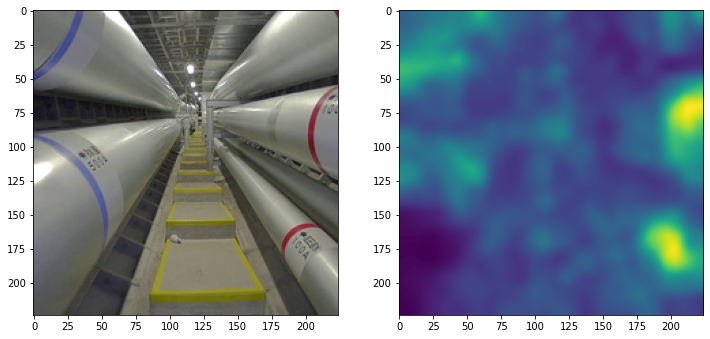

In [134]:
n = 640
img = test_imgs[n]
img = denormalization(img)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(heatmaps[n])
plt.show()

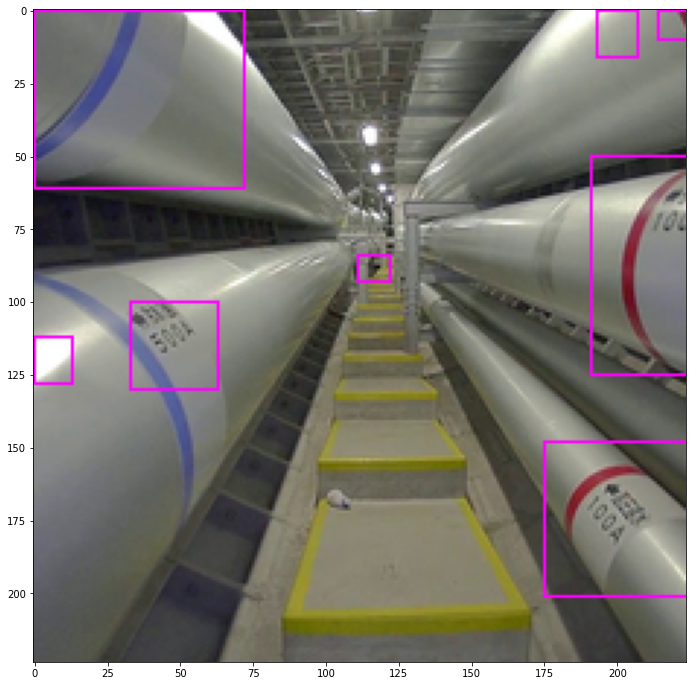

In [136]:
binary, bbxes, judge = get_bbx(heatmaps[n], threshold = 80, min_detected_area = 0)

c_img = draw_bbx(img, bbxes)

plt.figure(figsize=(12,12))
plt.imshow(c_img)